In [1]:
import os
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

In [2]:
model = YOLO("./training/small/runs/detect/train/weights/best.pt")
directory = "test_pred"


0: 640x640 2 gooses, 51.9ms
Speed: 3.4ms preprocess, 51.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


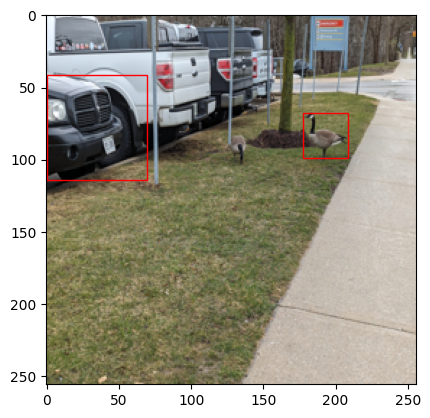


0: 640x640 3 gooses, 51.9ms
Speed: 2.4ms preprocess, 51.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


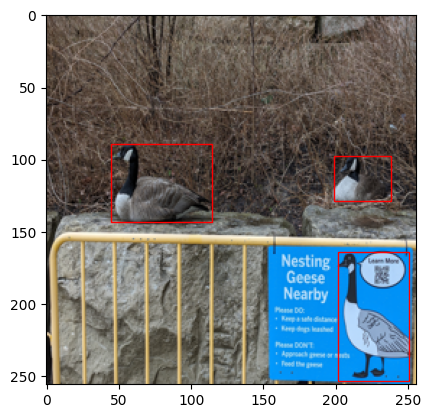


0: 640x640 1 goose, 51.8ms
Speed: 2.4ms preprocess, 51.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


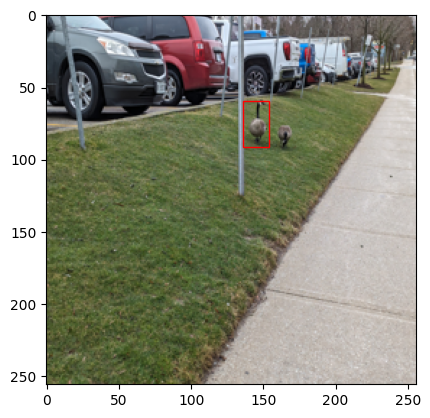


0: 640x640 (no detections), 51.8ms
Speed: 2.4ms preprocess, 51.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


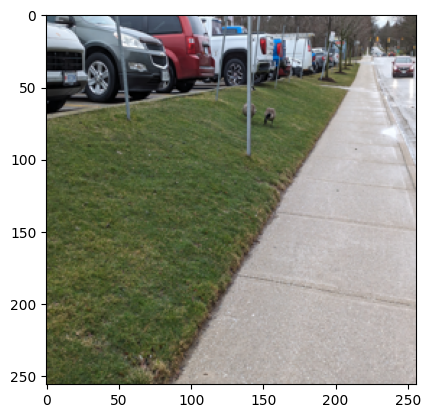

In [3]:
filenames = os.listdir(directory)

for filename in filenames:
    # Load the image
    img = Image.open(os.path.join(directory, filename))
    img = img.resize((256,256))

    result = model.predict(img)
    result = result[0].cpu()
    result = result.numpy()

    fig, ax = plt.subplots(1)
    ax.imshow(img)

    # Get bounding box coordinates and draw them on the image
    for i in range(len(result.boxes)):
            x1, y1, x2, y2 = result.boxes.xyxy[i]
            rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)

    plt.show()